In [60]:
import pandas as pd
import numpy as np

from pandas_profiling import ProfileReport

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ds_program_data - Sheet1.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   batch           54 non-null     int64  
 1   phase           54 non-null     int64  
 2   type            54 non-null     object 
 3   passing_rate    54 non-null     int64  
 4   avg_buddy       47 non-null     float64
 5   avg_materials   47 non-null     float64
 6   avg_instructor  47 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 3.1+ KB


In [4]:
df_full = df.fillna(df.mean())

In [5]:
df_full.describe()

,batch,phase,passing_rate,avg_buddy,avg_materials,avg_instructor
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,7.722222,1.000000,87.203704,8.832766,4.085745,4.456383
std,4.919797,0.824163,13.279832,0.662815,0.222081,0.207141
min,1.000000,0.000000,50.000000,5.620000,3.640000,4.000000
25%,3.000000,0.000000,78.250000,8.725000,4.000000,4.382500
50%,7.500000,1.000000,89.000000,8.905000,4.085745,4.456383
75%,12.000000,2.000000,100.000000,9.212500,4.242500,4.577500
max,16.000000,2.000000,100.000000,9.630000,4.730000,4.940000


In [117]:
profile = ProfileReport(df_full, title="Pandas Profiling Report", missing_diagrams={"bar": False, "matrix": False})
profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]


In [12]:
df_full.groupby(['type', 'phase'])['passing_rate', 'avg_buddy', 'avg_materials', 'avg_instructor'].mean()

<ipython-input-12-d500eecedbdd>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_full.groupby(['type', 'phase'])['passing_rate', 'avg_buddy', 'avg_materials', 'avg_instructor'].mean()


passing_rate  avg_buddy  avg_materials  avg_instructor
type phase                                                        
HCK  0            87.500   9.131383       4.042872        4.303191
     1           100.000   8.966383       3.917872        4.458191
     2           100.000   8.832766       4.085745        4.456383
RMT  0            74.000   8.712673       4.057859        4.394149
     1            86.125   8.674721       4.009468        4.415798
     2            98.250   9.056875       4.216250        4.578125

In [13]:
df_full.corr()

,batch,phase,passing_rate,avg_buddy,avg_materials,avg_instructor
batch,1.000000,0.000000,0.071925,-0.104190,-0.014984,-0.220295
phase,0.000000,1.000000,0.711981,0.169590,0.270086,0.359194
passing_rate,0.071925,0.711981,1.000000,0.123091,0.212673,0.115380
avg_buddy,-0.104190,0.169590,0.123091,1.000000,0.449138,0.465029
avg_materials,-0.014984,0.270086,0.212673,0.449138,1.000000,0.452761
avg_instructor,-0.220295,0.359194,0.115380,0.465029,0.452761,1.000000


In [26]:
df_rmt = df_full[df_full.type=='RMT']
df_hck = df_full[df_full.type=='HCK']

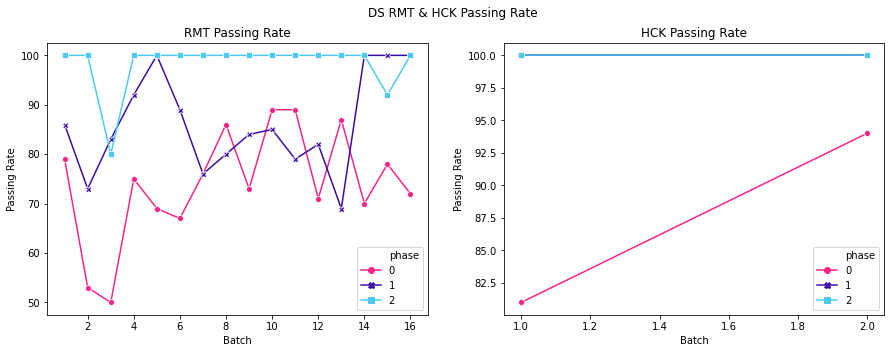

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('DS RMT & HCK Passing Rate')

rmt_plot = sns.lineplot(ax=axes[0],
    y='passing_rate', x='batch',
    hue='phase', style='phase', palette=['#F72585', '#3A0CA3', '#4CC9F0'], markers=True, dashes=False, data=df_rmt)
axes[0].set_title('RMT Passing Rate')
axes[0].set_ylabel('Passing Rate')
axes[0].set_xlabel('Batch')

hck_plot = sns.lineplot(ax=axes[1],
    y='passing_rate', x='batch',
    hue='phase', style='phase', palette=['#F72585', '#3A0CA3', '#4CC9F0'], markers=True, dashes=False, data=df_hck)
axes[1].set_title('HCK Passing Rate')
axes[1].set_ylabel('Passing Rate')
axes[1].set_xlabel('Batch')

plt.show()


In [81]:
df_hck['passing_rate'].mean()

95.83333333333333

In [110]:
import plotly.express as px

fig = px.line(df_rmt, y='passing_rate', x='batch', color='phase', markers=True, symbol='phase', title='RMT')
fig.update_layout(yaxis_range=[0,100])
fig.show()

In [91]:
df_full.batch.max()

16

In [100]:
df_full[
    (df_full.batch == df_full.batch.max()) &
    (df_full.phase == 0) &
    (df_full.type == 'RMT')
]['passing_rate']

45    72
Name: passing_rate, dtype: int64

In [105]:
df_full[
    (df_full.batch == df_full.batch.max()-1) &
    (df_full.phase == 0) &
    (df_full.type == 'RMT')
]['passing_rate']

42    78
Name: passing_rate, dtype: int64

In [109]:
df_full[
    (df_full.batch == df_hck.batch.max()) &
    (df_full.phase == 0) &
    (df_full.type == 'HCK')
]['passing_rate']

51    94
Name: passing_rate, dtype: int64

In [104]:
df_full[
    (df_full.batch == df_hck.batch.max()-1) &
    (df_full.phase == 0) &
    (df_full.type == 'HCK')
]['passing_rate']

48    81
Name: passing_rate, dtype: int64

In [111]:
def load_clean():
    df = pd.read_csv('ds_program_data - Sheet1.csv')

    df_full = df.fillna(df.mean(numeric_only=True))
    df_rmt = df_full[df_full.type=='RMT']
    df_hck = df_full[df_full.type=='HCK']

    return df_full, df_rmt, df_hck

In [113]:
df_full, df_rmt, df_hck = load_clean()

In [114]:
df_full

,batch,phase,type,passing_rate,avg_buddy,avg_materials,avg_instructor
0,1,0,RMT,79,8.950000,4.250000,4.380000
1,1,1,RMT,86,8.900000,4.000000,4.210000
2,1,2,RMT,100,9.050000,4.200000,4.580000
3,2,0,RMT,53,9.110000,4.130000,4.630000
4,2,1,RMT,73,8.200000,4.030000,4.570000
5,2,2,RMT,100,8.360000,4.420000,4.480000
6,3,0,RMT,50,8.110000,3.800000,4.660000
7,3,1,RMT,83,8.860000,4.000000,4.630000
8,3,2,RMT,80,9.430000,4.130000,4.820000
9,4,0,RMT,75,8.590000,3.880000,4.220000
